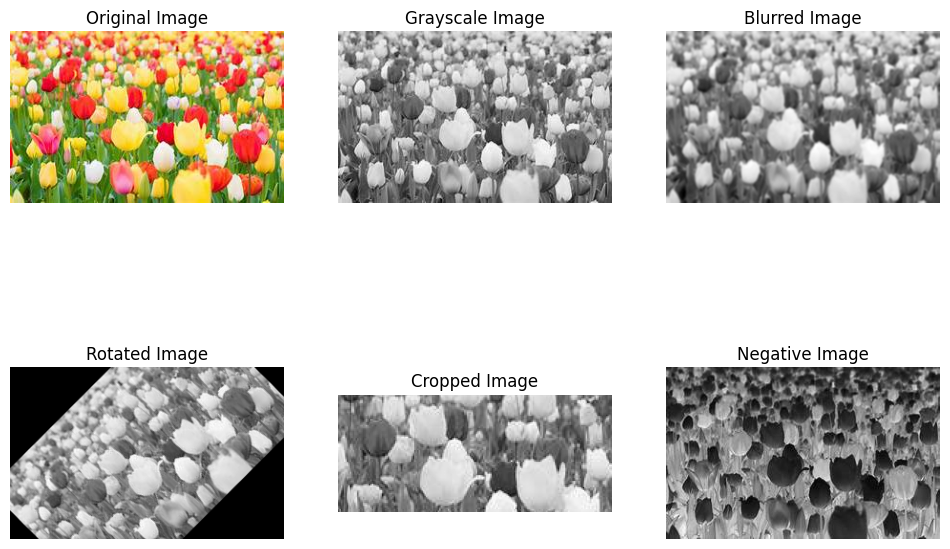

Dimensions: (180, 287)
Top-left 10x10 pixel values:
[[218 226 219 221 228 207 181 191 208 213]
 [212 220 217 217 219 199 182 197 210 213]
 [192 200 201 205 206 189 184 203 211 216]
 [161 166 175 188 193 186 189 204 211 218]
 [128 127 144 171 185 190 197 204 211 211]
 [111 105 129 164 181 194 209 211 205 192]
 [112 105 133 168 178 196 220 225 209 187]
 [120 114 144 175 177 195 228 236 224 199]
 [ 86 114 162 181 176 204 236 234 226 196]
 [ 99 111 145 166 169 196 226 227 217 186]]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image from file
image_path = '/content/fdl lab.jpeg'  # Replace with your image file path
image = cv2.imread(image_path)

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Rotate the image
(h, w) = gray_image.shape[:2]
center = (w // 2, h // 2)
angle = 45  # Angle to rotate
scale = 1.0  # Scale factor

# Compute the rotation matrix and perform the rotation
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (w, h))

# Crop the image (example: 50 pixels from each border)
x, y, w_crop, h_crop = 50, 50, w - 100, h - 100
cropped_image = gray_image[y:y+h_crop, x:x+w_crop]

# Find the dimensions and pixel values
dimensions = gray_image.shape
pixel_values = gray_image[0:10, 0:10]  # Example: top-left 10x10 pixels

# Create a negative image
negative_image = cv2.bitwise_not(gray_image)

# Display images using matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Blurred Image')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Rotated Image')
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Cropped Image')
plt.imshow(cropped_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Negative Image')
plt.imshow(negative_image, cmap='gray')
plt.axis('off')

plt.show()

# Print out pixel values and dimensions
print(f"Dimensions: {dimensions}")
print(f"Top-left 10x10 pixel values:\n{pixel_values}")